In [ ]:
options(warn=-1)

In [ ]:



library(ggplot2)
library(reshape2)
library(lattice)
library(plyr)
library(leaps)
library(gridExtra)
library(MASS)
library(caret)

## Exploratory Data Analysis

### Overview of the Training Dataset

In [33]:
# Load the training dataset
my.df <- read.delim2(header = FALSE, "TICDATA2000.txt")

# Load the testing dataset
test.data = read.delim2(header = FALSE, "TICEVAL2000.txt")
test.label = read.delim2(header = FALSE, "TICTGTS2000.txt")
dim(test.data)

[1] 4000   85

In [ ]:
var(my.df)

In [ ]:
nzv <- nearZeroVar(my.df, saveMetrics = TRUE)
nzv

In [4]:
# Display the dimensions
cat("The housing dataset has", dim(my.df)[1], "records, each with", dim(my.df)[2],
    "attributes.")

The housing dataset has 5822 records, each with 86 attributes.

In [5]:
# Refactor the trainning set
my.df$V1 <- factor(as.vector(my.df$V1),
                              levels=c(1:41),
                              labels=c("High Income, expensive child",
                                       "Very Important Provincials",
                                       "High status seniors",
                                       "Affluent senior apartments",
                                       "Mixed seniors",
                                       "Career and childcare",
                                       "Dinki's (Double income no kids)",
                                       "Middle class families",
                                       "Modern, complete families",
                                       "Stable family","Family starters",
                                       "Affluent young families",
                                       "Young all american family",
                                       "Junior cosmopolitans",
                                       "Senior cosmopolitans",
                                       "Students in apartments",
                                       "Fresh masters in the city",
                                       "Single youth",
                                       "Suburban youth",
                                       "Ethnically diverse",
                                       "Young urban have-nots",
                                       "Mixed apartment dwellers",
                                       "Young and rising", 
                                       "Young, low educated", 
                                       "Yound seniros in the city",
                                       "Own home elderly",
                                       "Seniors in apartments",
                                       "Residential elderly",
                                       "Porchless seniors: no front yard",
                                       "Religious elderly singles",
                                       "Low income catholics",
                                       "Mixed seniors2",
                                       "Lower class large families",
                                       "Large family,employed child",
                                       "Village families",
                                       "Couples with teens 'Married with children'",
                                       "Mixed small town dwellers",
                                       "Traditional families",
                                       "Large religous families",
                                       "Large family farms",
                                       "Mixed rurals"))

my.df$V4 <- factor(my.df$V4,
                     levels=c(1:6),
                     labels=c("20-30 years",
                              "30-40 years",
                              "40-50 years",
                              "50-60 years",
                              "60-70 years",
                              "70-80 years")) 

my.df$V5 <- factor(my.df$V5,
                                levels=(1:10),
                                labels=c("Successful hedonists",
                                         "Driven Growers",
                                         "Average Family",
                                         "Career Loners",
                                         "Living well",
                                         "Cruising Seniors",
                                         "Retired and Religious",
                                         "Family with grown ups",
                                         "Conservatie Families",
                                         "Farmers"))

my.df$V6 <- factor(my.df$V6,
                   levels=c(0:9),
                   labels=c("0%",
                            "1-10%",
                            "11-23%",
                            "24-36%",
                            "37-49%",
                            "50-62%",
                            "63-75%",
                            "76-88%",
                            "89-99%",
                            "100%"))


my.df$V44 <- factor(my.df$V44,
                   levels=c(0:9),
                   labels=c("0",
                            "1-49",
                            "50-99",
                            "100-199",
                            "200-499",
                            "500-999",
                            "1000-4999",
                            "5000-9999",
                            "10,000-19,999",
                            ">=20,000"))


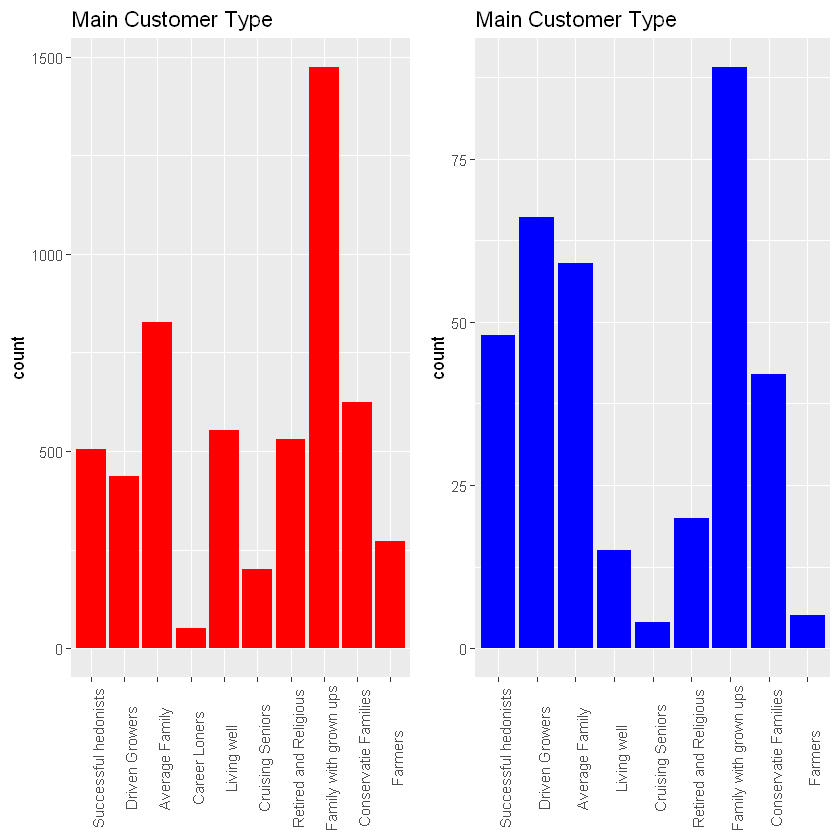

In [6]:
#Customer main type
df <- data.frame(my.df$V5,my.df$V86)
custMainTypeF = df[which(df$my.df.V86==0),]
custMainTypeT = df[which(df$my.df.V86==1),]
#Plot of Customer Main Type
d <- ggplot()+ ggtitle('Main Customer Type') + theme(axis.text.x=element_text(angle=90),axis.title.x=element_blank())
c=d + geom_bar(data=custMainTypeF, mapping=aes(x= custMainTypeF$my.df.V5),fill="red",position="stack")
e=d + geom_bar(data=custMainTypeT, mapping=aes(x= custMainTypeT$my.df.V5),fill="blue",position="stack")
v <- grid.arrange(c,e,ncol=2)

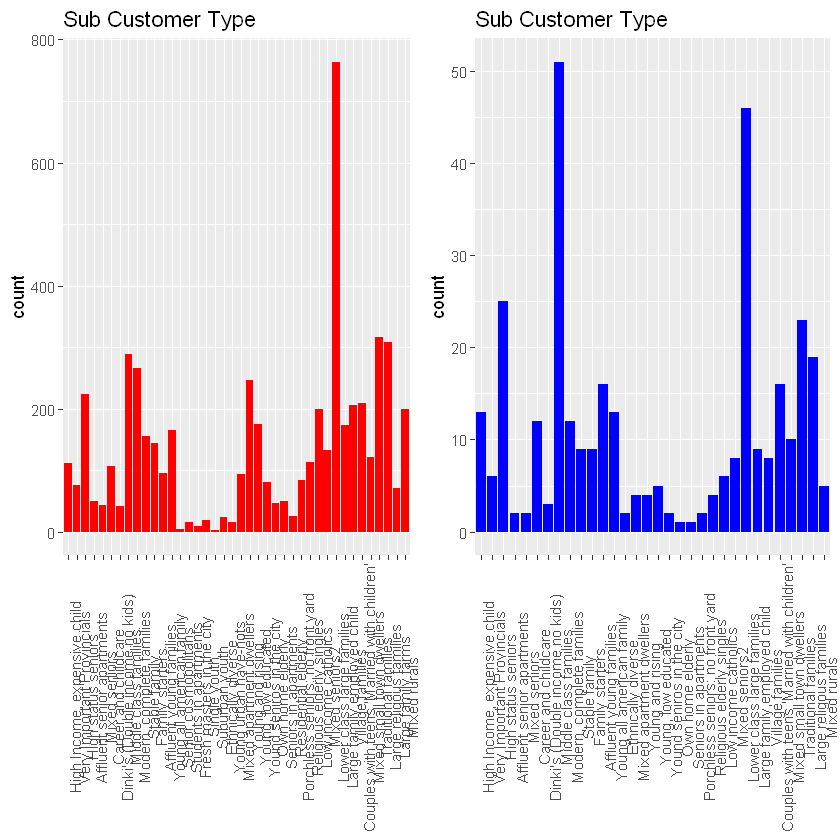

In [7]:
#Customer sub type
df <- data.frame(my.df$V1,my.df$V86)
custSubTypeF = df[which(df$my.df.V86==0),]
custSubTypeT = df[which(df$my.df.V86==1),]
#Plot of Customer Sub Type
d <- ggplot()+ ggtitle('Sub Customer Type') + theme(axis.text.x=element_text(angle=90),axis.title.x=element_blank())
c=d + geom_bar(data=custSubTypeF, mapping=aes(x= custSubTypeF$my.df.V1),fill="red",position="stack")
e=d + geom_bar(data=custSubTypeT, mapping=aes(x= custSubTypeT$my.df.V1),fill="blue",position="stack")
v <- grid.arrange(c,e,ncol=2)

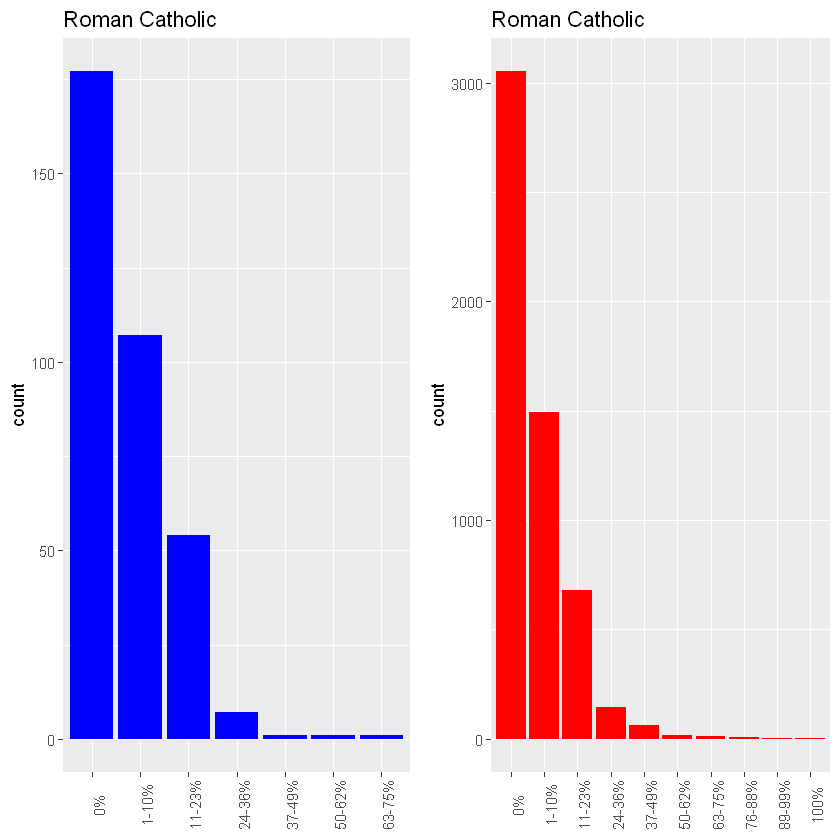

In [8]:
#Customer Roman Catholic
df <- data.frame(my.df$V6,my.df$V86)
RomanCatholicF = df[which(df$my.df.V86==0),]
RomanCatholicT = df[which(df$my.df.V86==1),]


par(mfcol=c(4,2))
#Plot of Roman Catholic
d <- ggplot()+ theme(axis.text.x=element_text(angle=90),axis.title.x=element_blank())+ ggtitle('Roman Catholic')
e=d + geom_bar(data=RomanCatholicF, mapping=aes(x= RomanCatholicF$my.df.V6),fill="red",position="stack")
c=d + geom_bar(data=RomanCatholicT, mapping=aes(x= RomanCatholicT$my.df.V6),fill="blue",position="stack")
v <- grid.arrange(c,e,ncol=2)


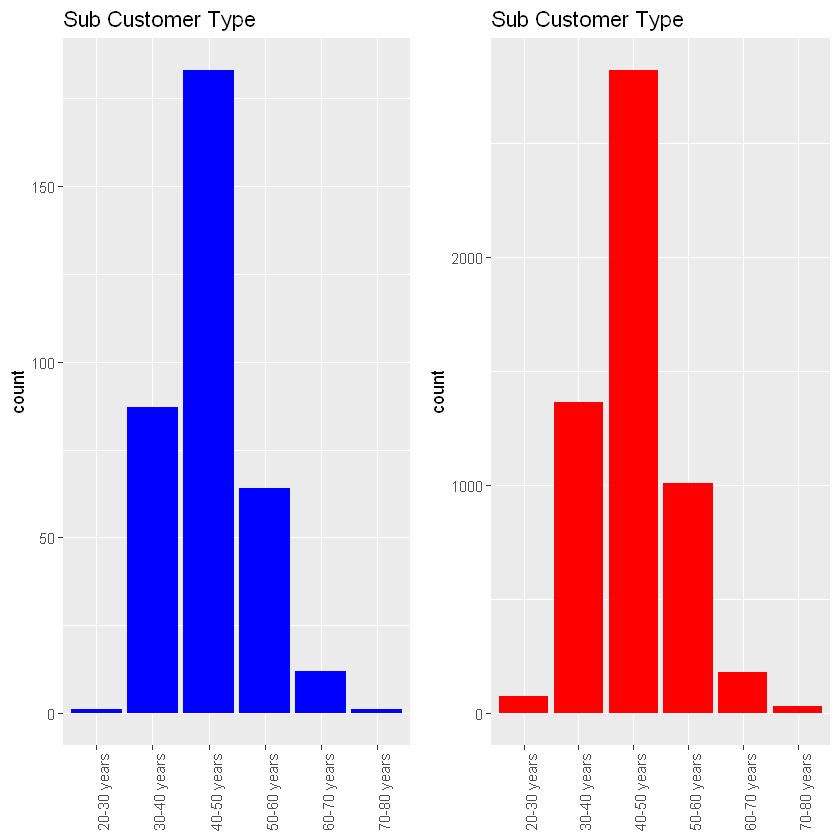

In [9]:
#Customer age
df <- data.frame(my.df$V4,my.df$V86)
custAgeF = df[which(df$my.df.V86==0),]
custAgeT = df[which(df$my.df.V86==1),]


par(mfcol=c(4,2))
#Plot of Customer Age
d <- ggplot()+ theme(axis.text.x=element_text(angle=90),axis.title.x=element_blank())+ ggtitle('Sub Customer Type')
e=d + geom_bar(data=custAgeF, mapping=aes(x= custAgeF$my.df.V4),fill="red",position="stack")
c=d + geom_bar(data=custAgeT, mapping=aes(x= custAgeT$my.df.V4),fill="blue",position="stack")
v <- grid.arrange(c,e,ncol=2)



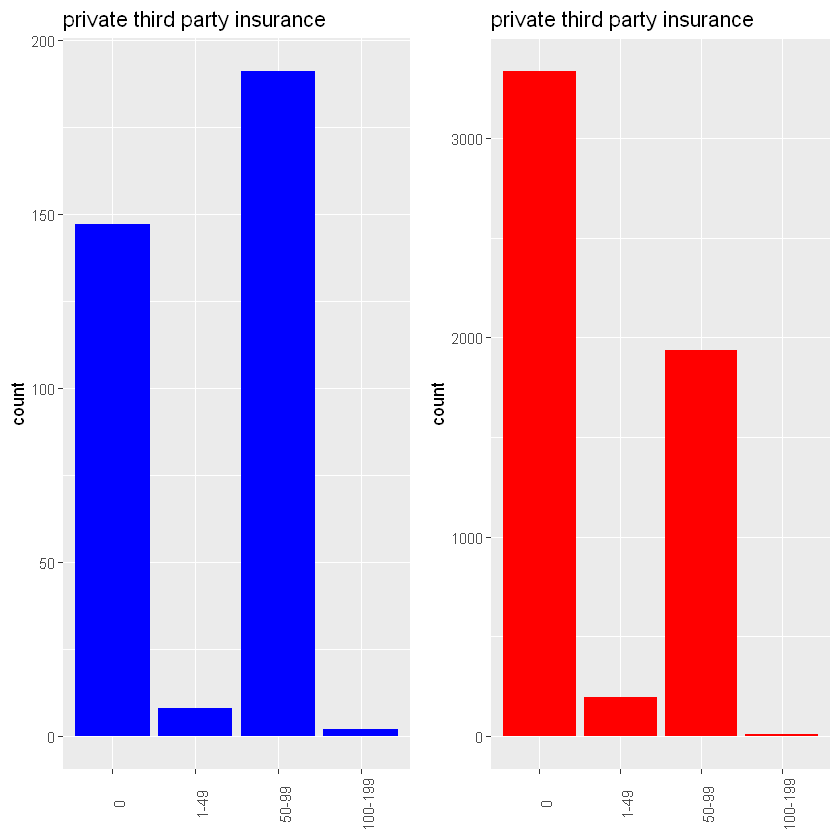

In [10]:
#Contribution private third party insurance
df <- data.frame(my.df$V44,my.df$V86)
cF = df[which(df$my.df.V86==0),]
cT = df[which(df$my.df.V86==1),]


par(mfcol=c(4,2))
#Plot of Contribution private third party insurance
d <- ggplot()+ theme(axis.text.x=element_text(angle=90),axis.title.x=element_blank())+ ggtitle('private third party insurance')
e=d + geom_bar(data=cF, mapping=aes(x= cF$my.df.V44),fill="red",position="stack")
c=d + geom_bar(data=cT, mapping=aes(x= cT$my.df.V44),fill="blue",position="stack")
v <- grid.arrange(c,e,ncol=2)




From these charts of factor variables, we can see that V6 and V4 has almost on impact on the choice of the target. Beacuse they have the almost same distribution. So I decided to drop them.

In [11]:
dim(my.df)

[1] 5822   86

In [12]:
head(my.df)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
Lower class large families,1,3,30-40 years,Family with grown ups,0%,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
Mixed small town dwellers,1,2,30-40 years,Family with grown ups,1-10%,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
Mixed small town dwellers,1,2,30-40 years,Family with grown ups,0%,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
"Modern, complete families",1,3,40-50 years,Average Family,11-23%,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
Large family farms,1,4,30-40 years,Farmers,1-10%,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
Young and rising,1,2,20-30 years,Living well,0%,5,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
str(my.df)

'data.frame':	5822 obs. of  86 variables:
 $ V1 : Factor w/ 41 levels "High Income, expensive child",..: 33 37 37 9 40 23 39 33 33 11 ...
 $ V2 : int  1 1 1 1 1 1 2 1 1 2 ...
 $ V3 : int  3 2 2 3 4 2 3 2 2 3 ...
 $ V4 : Factor w/ 6 levels "20-30 years",..: 2 2 2 3 2 1 2 3 4 3 ...
 $ V5 : Factor w/ 10 levels "Successful hedonists",..: 8 8 8 3 10 5 9 8 8 3 ...
 $ V6 : Factor w/ 10 levels "0%","1-10%","11-23%",..: 1 2 1 3 2 1 3 1 1 4 ...
 $ V7 : int  5 4 4 3 4 5 2 7 1 5 ...
 $ V8 : int  1 1 2 2 1 0 0 0 3 0 ...
 $ V9 : int  3 4 4 4 4 5 5 2 6 2 ...
 $ V10: int  7 6 3 5 7 0 7 7 6 7 ...
 $ V11: int  0 2 2 2 1 6 2 2 0 0 ...
 $ V12: int  2 2 4 2 2 3 0 0 3 2 ...
 $ V13: int  1 0 4 2 2 3 0 0 3 2 ...
 $ V14: int  2 4 4 3 4 5 3 5 3 2 ...
 $ V15: int  6 5 2 4 4 2 6 4 3 6 ...
 $ V16: int  1 0 0 3 5 0 0 0 0 0 ...
 $ V17: int  2 5 5 4 4 5 4 3 1 4 ...
 $ V18: int  7 4 4 2 0 4 5 6 8 5 ...
 $ V19: int  1 0 0 4 0 2 0 2 1 2 ...
 $ V20: int  0 0 0 0 5 0 0 0 1 0 ...
 $ V21: int  1 0 0 0 4 0 0 0 0 0 ...
 $ V22

In [14]:
summary(my.df)

                          V1             V2               V3       
 Lower class large families: 810   Min.   : 1.000   Min.   :1.000  
 Middle class families     : 339   1st Qu.: 1.000   1st Qu.:2.000  
 Traditional families      : 339   Median : 1.000   Median :3.000  
 Large religous families   : 328   Mean   : 1.111   Mean   :2.679  
 Modern, complete families : 278   3rd Qu.: 1.000   3rd Qu.:3.000  
 Young and rising          : 251   Max.   :10.000   Max.   :5.000  
 (Other)                   :3477                                   
           V4                           V5             V6             V7       
 20-30 years:  74   Family with grown ups:1563   0%     :3228   Min.   :0.000  
 30-40 years:1452   Average Family       : 886   1-10%  :1599   1st Qu.:4.000  
 40-50 years:3000   Conservatie Families : 667   11-23% : 733   Median :5.000  
 50-60 years:1073   Living well          : 569   24-36% : 152   Mean   :4.627  
 60-70 years: 193   Successful hedonists : 552   37-49% 

In [15]:
round(describe(my.df), 3)

ERROR: Error in describe(my.df): could not find function "describe"


In [16]:
# Refactor the testing set
test.data$V1 <- factor(as.vector(test.data$V1),
                              levels=c(1:41),
                              labels=c("High Income, expensive child",
                                       "Very Important Provincials",
                                       "High status seniors",
                                       "Affluent senior apartments",
                                       "Mixed seniors",
                                       "Career and childcare",
                                       "Dinki's (Double income no kids)",
                                       "Middle class families",
                                       "Modern, complete families",
                                       "Stable family","Family starters",
                                       "Affluent young families",
                                       "Young all american family",
                                       "Junior cosmopolitans",
                                       "Senior cosmopolitans",
                                       "Students in apartments",
                                       "Fresh masters in the city",
                                       "Single youth",
                                       "Suburban youth",
                                       "Ethnically diverse",
                                       "Young urban have-nots",
                                       "Mixed apartment dwellers",
                                       "Young and rising", 
                                       "Young, low educated", 
                                       "Yound seniros in the city",
                                       "Own home elderly",
                                       "Seniors in apartments",
                                       "Residential elderly",
                                       "Porchless seniors: no front yard",
                                       "Religious elderly singles",
                                       "Low income catholics",
                                       "Mixed seniors2",
                                       "Lower class large families",
                                       "Large family,employed child",
                                       "Village families",
                                       "Couples with teens 'Married with children'",
                                       "Mixed small town dwellers",
                                       "Traditional families",
                                       "Large religous families",
                                       "Large family farms",
                                       "Mixed rurals"))

test.data$V4 <- factor(test.data$V4,
                     levels=c(1:6),
                     labels=c("20-30 years",
                              "30-40 years",
                              "40-50 years",
                              "50-60 years",
                              "60-70 years",
                              "70-80 years")) 

test.data$V5 <- factor(test.data$V5,
                                levels=(1:10),
                                labels=c("Successful hedonists",
                                         "Driven Growers",
                                         "Average Family",
                                         "Career Loners",
                                         "Living well",
                                         "Cruising Seniors",
                                         "Retired and Religious",
                                         "Family with grown ups",
                                         "Conservatie Families",
                                         "Farmers"))

test.data$V6 <- factor(test.data$V6,
                   levels=c(0:9),
                   labels=c("0%",
                            "1-10%",
                            "11-23%",
                            "24-36%",
                            "37-49%",
                            "50-62%",
                            "63-75%",
                            "76-88%",
                            "89-99%",
                            "100%"))


test.data$V44 <- factor(test.data$V44,
                   levels=c(0:9),
                   labels=c("0",
                            "1-49",
                            "50-99",
                            "100-199",
                            "200-499",
                            "500-999",
                            "1000-4999",
                            "5000-9999",
                            "10,000-19,999",
                            ">=20,000"))


#test.label$V1 <- factor(test.label$V1,levels=c("0","1"))

In [17]:
fit1=glm(my.df$V86~.,data=my.df,family = binomial)
summary(fit1)


Call:
glm(formula = my.df$V86 ~ ., family = binomial, data = my.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8111  -0.3659  -0.2381  -0.1443   3.3109  

Coefficients: (9 not defined because of singularities)
                                               Estimate Std. Error z value
(Intercept)                                   2.560e+02  1.116e+04   0.023
V1Very Important Provincials                  4.531e-01  9.838e-01   0.461
V1High status seniors                         7.134e-01  8.488e-01   0.840
V1Affluent senior apartments                 -5.442e-01  1.153e+00  -0.472
V1Mixed seniors                               6.166e-01  1.995e+00   0.309
V1Career and childcare                        3.663e-01  4.774e-01   0.767
V1Dinki's (Double income no kids)            -3.453e-01  1.032e+00  -0.335
V1Middle class families                       6.046e-01  5.285e-01   1.144
V1Modern, complete families                   4.435e-01  1.541e+00   0.288
V1Stable fa

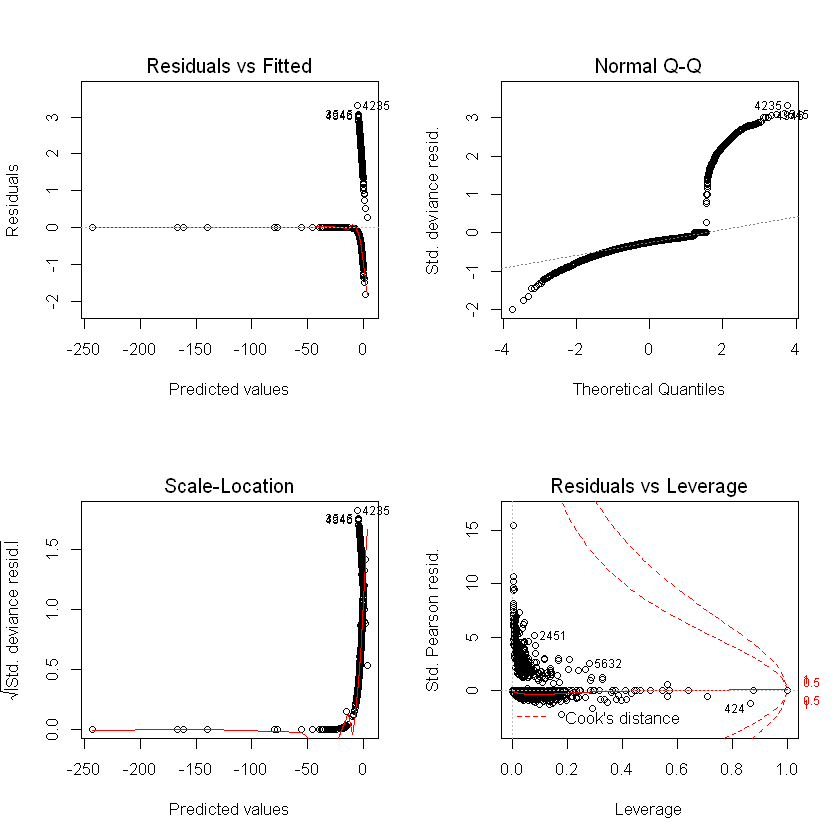

In [18]:
par(mfrow=c(2,2))
plot(fit1)

In [19]:
r.1=predict(fit1, test.data,type='response')
r1=rep(0, length(r.1))
r1[rank(r.1)<=800]=1
mean(r1==test.label)

[1] 0.748

In [25]:
#regfit.fwd <- regsubsets(my.df$V86~.,data=my.df, nvmax = 30, method = "forward")
#reg.summary.fwd=summary(regfit.fwd)
#reg.summary.fwd

In [26]:
#par(mfrow = c(2, 2))
#plot(reg.summary.fwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
#points(which.min(reg.summary.fwd$cp), reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)], col = "red", cex = 2, pch = 20)
#plot(reg.summary.fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
#points(which.min(reg.summary.fwd$bic), reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)], col = "red", cex = 2, pch = 20)
#plot(reg.summary.fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
#points(which.max(reg.summary.fwd$adjr2), reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)], col = "red", cex = 2, pch = 20)
#plot(reg.summary.fwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
#mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

In [22]:
f2=step(fit1)

Start:  AIC=2466.38
my.df$V86 ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + 
    V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + 
    V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + V29 + V30 + 
    V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38 + V39 + V40 + 
    V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + V49 + V50 + 
    V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V60 + 
    V61 + V62 + V63 + V64 + V65 + V66 + V67 + V68 + V69 + V70 + 
    V71 + V72 + V73 + V74 + V75 + V76 + V77 + V78 + V79 + V80 + 
    V81 + V82 + V83 + V84 + V85


Step:  AIC=2466.38
my.df$V86 ~ V1 + V2 + V3 + V4 + V6 + V7 + V8 + V9 + V10 + V11 + 
    V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + 
    V22 + V23 + V24 + V25 + V26 + V27 + V28 + V29 + V30 + V31 + 
    V32 + V33 + V34 + V35 + V36 + V37 + V38 + V39 + V40 + V41 + 
    V42 + V43 + V44 + V45 + V46 + V47 + V48 + V49 + V50 + V51 + 
    V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V60 + V61 + 
    V62 + V63 + V6

In [23]:
fit2=f2
summary(fit2)


Call:
glm(formula = my.df$V86 ~ V7 + V10 + V12 + V17 + V18 + V21 + 
    V22 + V30 + V31 + V32 + V37 + V38 + V39 + V40 + V44 + V46 + 
    V47 + V52 + V53 + V55 + V58 + V59 + V62 + V63 + V65 + V73 + 
    V76 + V79 + V80 + V82 + V84 + V85, family = binomial, data = my.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5905  -0.3731  -0.2502  -0.1670   3.2066  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  126.62592 4679.57334   0.027 0.978412    
V7             0.07141    0.03613   1.976 0.048135 *  
V10            0.17766    0.07679   2.314 0.020690 *  
V12            0.12007    0.08440   1.423 0.154854    
V17           -0.08983    0.04887  -1.838 0.066074 .  
V18           -0.14798    0.04092  -3.616 0.000299 ***
V21           -0.21570    0.08308  -2.596 0.009426 ** 
V22            0.05884    0.03361   1.751 0.080008 .  
V30          -14.88161  519.95260  -0.029 0.977167    
V31          -14.85763  519.95260  -0.029 0.977204

In [24]:
r.2=predict(fit2, test.data,type='response')
r2=rep(0, length(r.2))
r2[rank(r.2)<=800]=1
mean(r2)
mean(r2==test.label)

[1] 0.2

[1] 0.7475

In [29]:
fit2


Call:  glm(formula = my.df$V86 ~ V7 + V10 + V12 + V17 + V18 + V21 + 
    V22 + V30 + V31 + V32 + V37 + V38 + V39 + V40 + V44 + V46 + 
    V47 + V52 + V53 + V55 + V58 + V59 + V62 + V63 + V65 + V73 + 
    V76 + V79 + V80 + V82 + V84 + V85, family = binomial, data = my.df)

Coefficients:
(Intercept)           V7          V10          V12          V17          V18  
  126.62592      0.07141      0.17766      0.12007     -0.08983     -0.14798  
        V21          V22          V30          V31          V32          V37  
   -0.21570      0.05884    -14.88161    -14.85763      0.07759      0.14856  
        V38          V39          V40      V441-49     V4450-99   V44100-199  
    0.19016      0.17733      0.22919     17.01090     17.38722     19.50752  
        V46          V47          V52          V53          V55          V58  
   -0.32724      0.22944      0.61979     -5.47368     -0.26362      0.84629  
        V59          V62          V63          V65          V73          V76  
  

In [ ]:
fit.lda = lda(formula = my.df$V86 ~ V7 + V10 + V12 + V17 + V18 + V21 + 
    V22 + V30 + V31 + V32 + V37 + V38 + V39 + V40 + V44 + V46 + 
    V47 + V63 + V65 + V73 + 
    V76 + V79 + V80 + V82 + V84 + V85, data = my.df)
fit.lda